In [111]:
import matplotlib 
import pandas as pd
%matplotlib inline
import pandas
import statistics
import sklearn.ensemble
from sklearn.ensemble import GradientBoostingClassifier
import evaluation

In [135]:
folder = 'C:/MSDS/Proj/flav/'
df = pandas.read_csv(folder + 'training.csv', index_col='id')

In [123]:
df.head()

,LifeTime,dira,FlightDistance,FlightDistanceError,IP,IPSig,VertexChi2,pt,DOCAone,DOCAtwo,...,p1_p,p2_p,p0_eta,p1_eta,p2_eta,SPDhits,production,signal,mass,min_ANNmuon
id,,,,,,,,,,,,,,,,,,,,,
18453471,0.001578,0.999999,14.033335,0.681401,0.016039,0.451886,1.900433,1482.037476,0.066667,0.060602,...,12290.760742,39264.398438,3.076006,4.003800,4.031514,458,-99,0,1866.300049,0.277559
5364094,0.000988,0.999705,5.536157,0.302341,0.142163,9.564503,0.865666,3050.720703,0.024022,0.019245,...,16562.667969,7341.257812,3.228553,2.786543,2.975564,406,-99,0,1727.095947,0.225924
11130990,0.000877,0.999984,6.117302,0.276463,0.034746,1.970751,10.975849,3895.908691,0.055044,0.047947,...,22695.388672,10225.309570,3.536903,2.865686,3.052810,196,-99,0,1898.588013,0.368630
15173787,0.000854,0.999903,5.228067,0.220739,0.076389,4.271331,3.276358,4010.781738,0.053779,0.006417,...,16909.515625,9141.426758,3.087461,3.218034,2.375592,137,-99,0,1840.410034,0.246045
1102544,0.001129,0.999995,39.069534,1.898197,0.120936,4.984982,0.468348,4144.546875,0.004491,0.037326,...,97612.804688,47118.785156,4.632295,4.711155,4.296878,477,-99,0,1899.793945,0.222060


In [142]:
df.shape


(67553, 50)

In [158]:
from sklearn.model_selection import train_test_split
# AUC scores are only calculated on samples with min_ANNmuon predictions
#  with values greater than 0.4
tn1, val = train_test_split(df, test_size=0.35,random_state=42,stratify=None)
tn2 = val
print(tn1.shape, val.shape)
tn2 = tn2[tn2['min_ANNmuon'] <= 0.4]
print(tn2.shape)
tn = pd.concat([tn1,tn2])
val = val[val['min_ANNmuon'] > 0.4]
print("_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _")
print("Final Train/Validation sizes:")
print(tn.shape, val.shape)
print("Validation Test Size:  %.2f%%" % (100*(val.shape[0]/(df.shape[0]))))

(43909, 50) (23644, 50)
(10258, 50)
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
Final Train/Validation sizes:
(54167, 50) (13386, 50)
Validation Test Size:  19.82%


# Variables
Omit features not included in test set and SPDhits (causes failure of agreement test)

In [10]:
v = list(tn.columns.values)
variables = []
for e in v:
    if e not in ('signal', 'mass', 'production', 'min_ANNmuon', 'SPDhits'):
        variables.append(e)
#print(v)
print(variables)

['LifeTime', 'dira', 'FlightDistance', 'FlightDistanceError', 'IP', 'IPSig', 'VertexChi2', 'pt', 'DOCAone', 'DOCAtwo', 'DOCAthree', 'IP_p0p2', 'IP_p1p2', 'isolationa', 'isolationb', 'isolationc', 'isolationd', 'isolatione', 'isolationf', 'iso', 'CDF1', 'CDF2', 'CDF3', 'ISO_SumBDT', 'p0_IsoBDT', 'p1_IsoBDT', 'p2_IsoBDT', 'p0_track_Chi2Dof', 'p1_track_Chi2Dof', 'p2_track_Chi2Dof', 'p0_IP', 'p1_IP', 'p2_IP', 'p0_IPSig', 'p1_IPSig', 'p2_IPSig', 'p0_pt', 'p1_pt', 'p2_pt', 'p0_p', 'p1_p', 'p2_p', 'p0_eta', 'p1_eta', 'p2_eta']


# Training

In [28]:
GBC = GradientBoostingClassifier(n_estimators=200, 
                                 learning_rate=0.1, 
                                 subsample=0.4, 
                                 min_samples_leaf=3, 
                                 max_depth=6, 
                                 random_state=11)
GBC.fit(tn[variables], tn['signal'])

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=3,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=200, presort='auto', random_state=11,
              subsample=0.4, verbose=0, warm_start=False)

                     importance
isolationd             0.002999
isolatione             0.003026
isolationf             0.004032
isolationb             0.007695
isolationc             0.008320
isolationa             0.008556
iso                    0.011978
CDF1                   0.014434
FlightDistance         0.015011
p2_pt                  0.015169
p0_eta                 0.015775
DOCAone                0.016383
CDF2                   0.016421
p1_pt                  0.016519
FlightDistanceError    0.016910
DOCAthree              0.018937
p1_p                   0.019053
p0_p                   0.019255
CDF3                   0.019451
p0_pt                  0.019558
p2_p                   0.020499
p1_eta                 0.020732
p2_eta                 0.020832
p1_IP                  0.020892
p1_IsoBDT              0.021180
pt                     0.021221
p2_IsoBDT              0.021568
p1_IPSig               0.021841
DOCAtwo                0.022036
p0_IP                  0.022199
p0_IsoBD

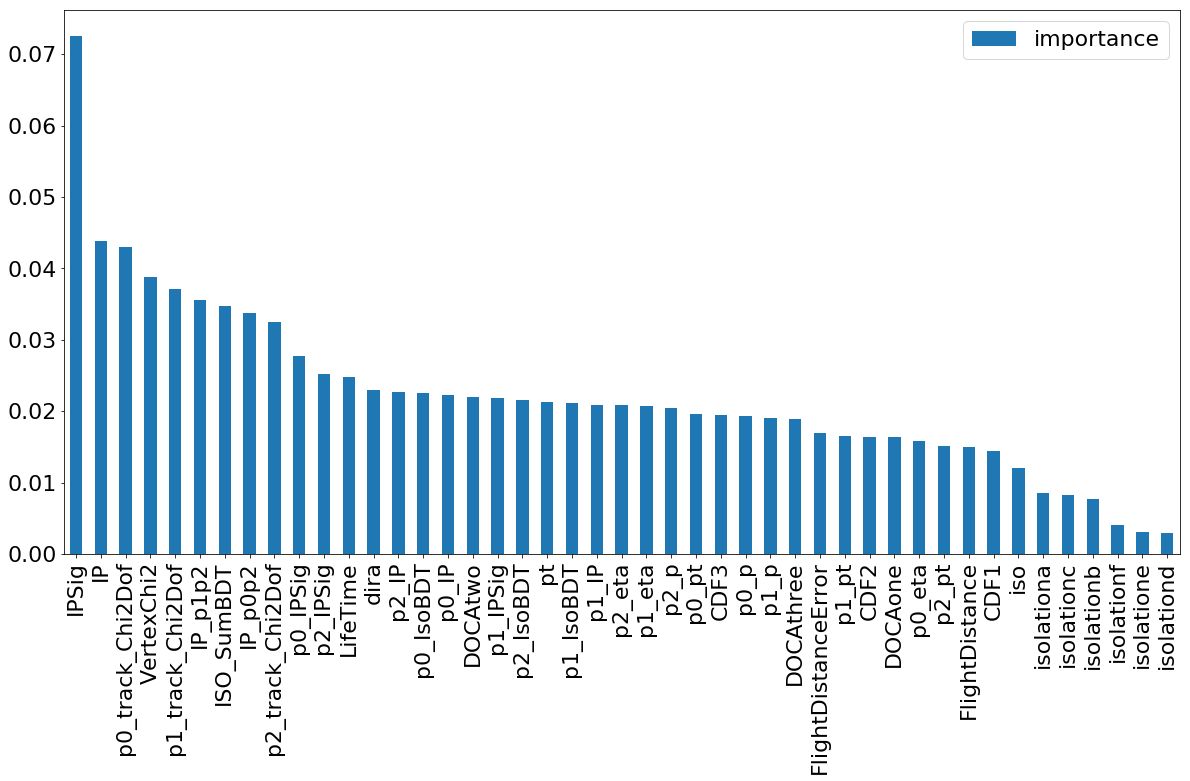

In [32]:
import matplotlib 
import pandas as pd
%matplotlib inline
matplotlib.rcParams.update({'font.size': 22})
#do code to support model
#"data" is the X dataframe and model is the SKlearn object

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(tn[variables].columns, GBC.feature_importances_):
    feats[feature] = importance #add the name/value pair 


importancez = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'importance'})
print(importancez.sort_values(by='importance', ascending=True))
importancez.sort_values(by='importance', ascending=False).plot(kind='bar', rot=90, figsize=(20,10))

print(importancez.sort_values(by='importance', ascending=False))

In [80]:
variables2 = importancez[~(importancez['importance'] <= 0.0155)] 
print(variables2.sort_values(by='importance', ascending=False))
#GBCvariables= variables2[0].tolist()
#print(GBCvariables)
print(variables2.columns.values)
variables2.reset_index().values.tolist()

                  importance
IPSig               0.150664
IP                  0.058094
p0_track_Chi2Dof    0.056267
VertexChi2          0.050187
LifeTime            0.037862
p0_IPSig            0.034258
p1_track_Chi2Dof    0.033887
p2_track_Chi2Dof    0.032857
ISO_SumBDT          0.032117
IP_p0p2             0.025555
iso                 0.024880
dira                0.024110
IP_p1p2             0.023591
p0_IP               0.020850
p1_IsoBDT           0.018307
pt                  0.017694
p1_IPSig            0.017692
p2_IPSig            0.017261
p2_IP               0.017107
p0_IsoBDT           0.016792
p0_p                0.016776
p2_eta              0.016514
p1_eta              0.015841
DOCAone             0.015735
['importance']


[['LifeTime', 0.03786165447566093],
 ['dira', 0.024110195704911748],
 ['IP', 0.05809354013071767],
 ['IPSig', 0.15066390486284637],
 ['VertexChi2', 0.05018690375894943],
 ['pt', 0.017693697915652194],
 ['DOCAone', 0.01573506256996643],
 ['IP_p0p2', 0.025555081185857753],
 ['IP_p1p2', 0.02359050937185219],
 ['iso', 0.02488022213018628],
 ['ISO_SumBDT', 0.03211702458033512],
 ['p0_IsoBDT', 0.016792139847873404],
 ['p1_IsoBDT', 0.018307032504126342],
 ['p0_track_Chi2Dof', 0.05626723981356726],
 ['p1_track_Chi2Dof', 0.03388745002802058],
 ['p2_track_Chi2Dof', 0.032856750438582265],
 ['p0_IP', 0.020850214656711115],
 ['p2_IP', 0.017106873076858785],
 ['p0_IPSig', 0.034257869419502145],
 ['p1_IPSig', 0.017691872408007216],
 ['p2_IPSig', 0.0172609568785372],
 ['p0_p', 0.016775548528598132],
 ['p1_eta', 0.015841193211931108],
 ['p2_eta', 0.016514429340401558]]

# Check agreement test

In [41]:
check_agreement = pandas.read_csv(folder + 'check_agreement.csv', index_col='id')
agreement_probs = baseline.predict_proba(check_agreement[variables])[:, 1]

ks = evaluation.compute_ks(
    agreement_probs[check_agreement['signal'].values == 0],
    agreement_probs[check_agreement['signal'].values == 1],
    check_agreement[check_agreement['signal'] == 0]['weight'].values,
    check_agreement[check_agreement['signal'] == 1]['weight'].values)
print('KS metric', ks, ks < 0.09)


KS metric 0.0668077251986 True


# Reduce the variables

In [11]:
X_train=tn[variables]
X_test=val[variables]
y_train=tn['signal']
y_test=val['signal']

In [45]:
#for loop code by Jason Brownlee
#https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
# use feature importance for feature selection
from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

model = GradientBoostingClassifier(n_estimators=40, learning_rate=0.1, subsample=0.4,
                                      min_samples_leaf=3, max_depth=6, random_state=11)
model.fit(X_train, y_train)
# make predictions for test data and evaluate
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
        # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = GradientBoostingClassifier(n_estimators=40, 
                                                 learning_rate=0.1, subsample=0.4,
                                                 min_samples_leaf=3, max_depth=6,
                                                 random_state=11)
    selection_model.fit(select_X_train, y_train)
    # evaluate model 
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % 
          (thresh, select_X_train.shape[1], accuracy*100.0))

Accuracy: 87.00%
Thresh=0.001, n=45, Accuracy: 87.00%
Thresh=0.002, n=44, Accuracy: 86.97%
Thresh=0.003, n=43, Accuracy: 87.03%
Thresh=0.005, n=42, Accuracy: 86.92%
Thresh=0.006, n=41, Accuracy: 86.90%
Thresh=0.007, n=40, Accuracy: 87.25%
Thresh=0.012, n=39, Accuracy: 87.05%
Thresh=0.012, n=38, Accuracy: 87.14%
Thresh=0.012, n=37, Accuracy: 87.10%
Thresh=0.012, n=36, Accuracy: 86.76%
Thresh=0.012, n=35, Accuracy: 86.97%
Thresh=0.013, n=34, Accuracy: 86.65%
Thresh=0.013, n=33, Accuracy: 86.74%
Thresh=0.013, n=32, Accuracy: 86.98%
Thresh=0.013, n=31, Accuracy: 87.13%
Thresh=0.015, n=30, Accuracy: 86.98%
Thresh=0.015, n=29, Accuracy: 86.77%
Thresh=0.015, n=28, Accuracy: 86.92%
Thresh=0.015, n=27, Accuracy: 87.02%
Thresh=0.015, n=26, Accuracy: 86.80%
Thresh=0.015, n=25, Accuracy: 86.83%
Thresh=0.016, n=24, Accuracy: 87.00%
Thresh=0.016, n=23, Accuracy: 86.94%
Thresh=0.017, n=22, Accuracy: 86.95%
Thresh=0.017, n=21, Accuracy: 86.77%
Thresh=0.017, n=20, Accuracy: 86.72%
Thresh=0.017, n=19, A

In [48]:
print(thresholds)

[ 0.00134882  0.00171656  0.00253974  0.00526723  0.00637701  0.00700034
  0.01169232  0.01196515  0.0120502   0.01235119  0.01238425  0.01257527
  0.01263686  0.01331523  0.01335558  0.01451226  0.01462379  0.01463006
  0.01470064  0.01495723  0.01510292  0.01573506  0.01584119  0.01651443
  0.01677555  0.01679214  0.01710687  0.01726096  0.01769187  0.0176937
  0.01830703  0.02085021  0.02359051  0.0241102   0.02488022  0.02555508
  0.03211702  0.03285675  0.03388745  0.03425787  0.03786165  0.0501869
  0.05626724  0.05809354  0.1506639 ]


In [47]:
df3 = result[~(result['Value'] <= 10)]  

AttributeError: 'numpy.ndarray' object has no attribute 'named_steps'

In [67]:
#for loop code by Jason Brownlee
#https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
# use feature importance for feature selection
#Gradiante boosting info
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
model = GradientBoostingClassifier(n_estimators=40, learning_rate=0.1, subsample=0.4,
                                      min_samples_leaf=3, max_depth=6, random_state=11)
model.fit(X_train, y_train)
# make predictions for test data and evaluate
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.3f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
        # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = GradientBoostingClassifier(n_estimators=40, learning_rate=0.1, subsample=0.4,
                                      min_samples_leaf=3, max_depth=6, random_state=11)
    selection_model.fit(select_X_train, y_train)
    # evaluate model 
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.6f, n=%d, Accuracy: %.3f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Accuracy: 86.996%
Thresh=0.001349, n=45, Accuracy: 86.996%
Thresh=0.001717, n=44, Accuracy: 86.974%
Thresh=0.002540, n=43, Accuracy: 87.025%
Thresh=0.005267, n=42, Accuracy: 86.922%
Thresh=0.006377, n=41, Accuracy: 86.900%
Thresh=0.007000, n=40, Accuracy: 87.255%
Thresh=0.011692, n=39, Accuracy: 87.055%
Thresh=0.011965, n=38, Accuracy: 87.144%
Thresh=0.012050, n=37, Accuracy: 87.099%
Thresh=0.012351, n=36, Accuracy: 86.759%
Thresh=0.012384, n=35, Accuracy: 86.966%
Thresh=0.012575, n=34, Accuracy: 86.648%
Thresh=0.012637, n=33, Accuracy: 86.737%
Thresh=0.013315, n=32, Accuracy: 86.981%
Thresh=0.013356, n=31, Accuracy: 87.129%
Thresh=0.014512, n=30, Accuracy: 86.981%
Thresh=0.014624, n=29, Accuracy: 86.766%
Thresh=0.014630, n=28, Accuracy: 86.922%
Thresh=0.014701, n=27, Accuracy: 87.018%
Thresh=0.014957, n=26, Accuracy: 86.796%
Thresh=0.015103, n=25, Accuracy: 86.833%
Thresh=0.015735, n=24, Accuracy: 87.003%
Thresh=0.015841, n=23, Accuracy: 86.944%
Thresh=0.016514, n=22, Accuracy: 86.951

In [15]:
#ADD WEIGHTED AUC SCORING

#for loop code by Jason Brownlee
#https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
# use feature importance for feature selection
#Gradiante boosting info
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel


model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, subsample=0.4,
                                      min_samples_leaf=3, max_depth=6, random_state=11)
model.fit(X_train, y_train)
# make predictions for test data and evaluate
val_probs = model.predict_proba(X_test)[:, 1]
roc_auc = evaluation.roc_auc_truncated(y_test, val_probs)
print("AUC: %.6f" % (roc_auc))
# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
        # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, subsample=0.4,
                                      min_samples_leaf=3, max_depth=6, random_state=11)
    selection_model.fit(select_X_train, y_train)
    # evaluate model 
    select_X_test = selection.transform(X_test)

    val_probs = selection_model.predict_proba(select_X_test)[:, 1]
    roc_auc = evaluation.roc_auc_truncated(y_test, val_probs)
    
    print("Thresh=%.6f, n=%d, AUC: %.6f" % (thresh, select_X_train.shape[1], roc_auc))

AUC: 0.984050
Thresh=0.002999, n=45, AUC: 0.984050
Thresh=0.003026, n=44, AUC: 0.983583
Thresh=0.004032, n=43, AUC: 0.984252
Thresh=0.007695, n=42, AUC: 0.984945
Thresh=0.008320, n=41, AUC: 0.985029
Thresh=0.008556, n=40, AUC: 0.983928
Thresh=0.011978, n=39, AUC: 0.982815
Thresh=0.014434, n=38, AUC: 0.983715
Thresh=0.015011, n=37, AUC: 0.983858
Thresh=0.015169, n=36, AUC: 0.985136
Thresh=0.015775, n=35, AUC: 0.984464
Thresh=0.016383, n=34, AUC: 0.984668
Thresh=0.016421, n=33, AUC: 0.983949
Thresh=0.016519, n=32, AUC: 0.984217
Thresh=0.016910, n=31, AUC: 0.984202
Thresh=0.018937, n=30, AUC: 0.983723
Thresh=0.019053, n=29, AUC: 0.983153
Thresh=0.019255, n=28, AUC: 0.983194
Thresh=0.019451, n=27, AUC: 0.982219
Thresh=0.019558, n=26, AUC: 0.983566
Thresh=0.020499, n=25, AUC: 0.984289
Thresh=0.020732, n=24, AUC: 0.983030
Thresh=0.020832, n=23, AUC: 0.982702
Thresh=0.020892, n=22, AUC: 0.981903
Thresh=0.021180, n=21, AUC: 0.982184
Thresh=0.021221, n=20, AUC: 0.983123
Thresh=0.021568, n=19, A

# Thresh=0.015169, n=36, AUC: 0.985136

In [19]:
model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, subsample=0.4,
                                      min_samples_leaf=3, max_depth=6, random_state=11)
model.fit(X_train, y_train)
# make predictions for test data and evaluate
val_probs = model.predict_proba(X_test)[:, 1]
roc_auc = evaluation.roc_auc_truncated(y_test, val_probs)
print("AUC: %.6f" % (roc_auc))

selection = SelectFromModel(model, threshold=0.015169, prefit=True)
select_X_train = selection.transform(X_train)
selection_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, subsample=0.4,
                                      min_samples_leaf=3, max_depth=6, random_state=11)
selection_model.fit(select_X_train, y_train)
select_X_test = selection.transform(X_test)
val_probs = selection_model.predict_proba(select_X_test)[:, 1]
roc_auc = evaluation.roc_auc_truncated(y_test, val_probs)
print("AUC: %.6f" % (roc_auc))
#selection_model.save_model('GBC')
      
featsF = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(select_X_train.columns, selection_model.feature_importances_):
    featsF[feature] = importance #add the name/value pair 


importancez = pd.DataFrame.from_dict(featsF, orient='index').rename(columns={0: 'importance'})
importancez.sort_values(by='importance', ascending=False).plot(kind='bar', rot=90, figsize=(20,10))

print(importancez.sort_values(by='importance', ascending=False))


AUC: 0.984050
AUC: 0.985136


AttributeError: 'GradientBoostingClassifier' object has no attribute 'save_model'

                     importance
IPSig                  0.071569
p0_track_Chi2Dof       0.043973
IP                     0.043844
VertexChi2             0.038586
p2_track_Chi2Dof       0.036175
IP_p1p2                0.035198
p1_track_Chi2Dof       0.035169
IP_p0p2                0.034002
ISO_SumBDT             0.032333
p0_IPSig               0.030040
p0_IP                  0.026190
p2_IPSig               0.026049
dira                   0.025686
p2_eta                 0.025001
p2_IP                  0.024365
p0_IsoBDT              0.023464
LifeTime               0.023230
p1_IsoBDT              0.021393
p1_IPSig               0.021255
pt                     0.021182
p2_IsoBDT              0.020891
CDF3                   0.020396
p2_p                   0.020110
p0_p                   0.020010
p1_eta                 0.019534
DOCAthree              0.019440
p1_p                   0.018129
FlightDistanceError    0.017922
p0_pt                  0.017910
DOCAtwo                0.017856
p1_IP   

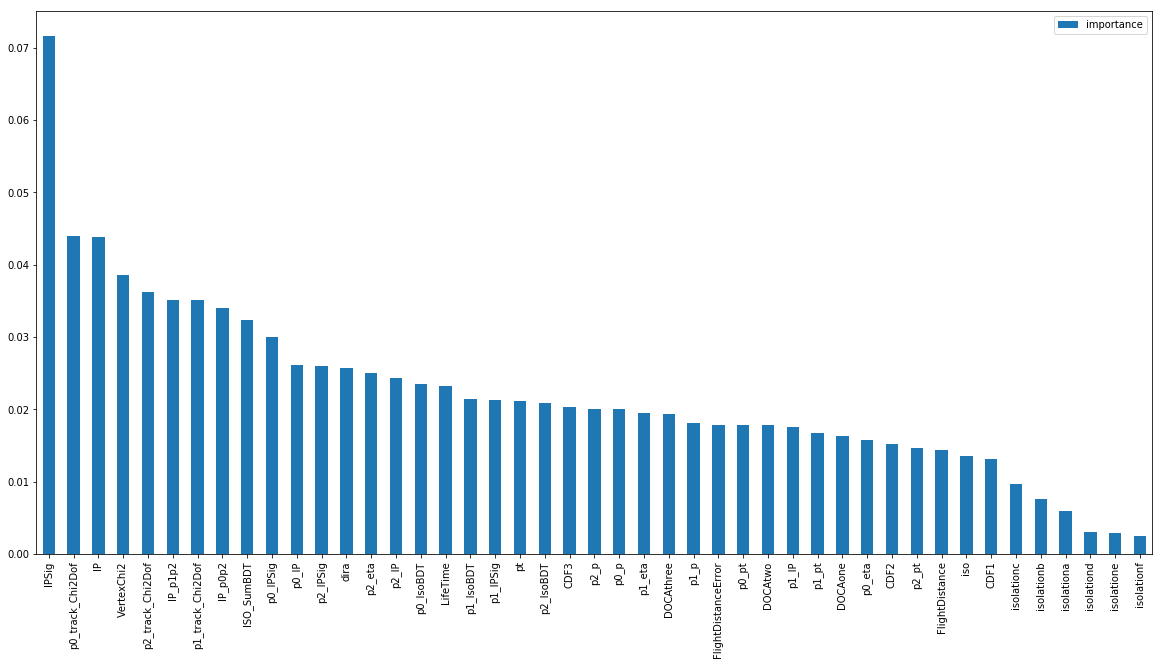

In [173]:
import pandas as pd
featsF = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train.columns, model.feature_importances_):
    featsF[feature] = importance #add the name/value pair 


importancez = pd.DataFrame.from_dict(featsF, orient='index').rename(columns={0: 'importance'})
importancez.sort_values(by='importance', ascending=False).plot(kind='bar', rot=90, figsize=(20,10))

print(importancez.sort_values(by='importance', ascending=False))


# Further reduce variables

In [35]:
tn, val = train_test_split(df, test_size=0.2,random_state=42,stratify=None)
val = val[val['min_ANNmuon'] > 0.4]
print(tn.shape, val.shape)

(54042, 50) (7642, 50)


In [33]:
#After evaluting SelectFromModel & CORRPLOT
v = list(tn.columns.values)
variables = []
for e in v:
    if e not in ('signal', 'mass', 'production', 'min_ANNmuon', 'SPDhits', 
                 'isolationa', 'isolationb', 'isolationc', 'isolationd', 'isolatione', 'isolationf', 
                'FlightDistance', 'CDF1', 'iso',
                'IP'):
        variables.append(e)
#print(v)
print(variables)
X_train=tn[variables]
X_test=val[variables]
y_train=tn['signal']
y_test=val['signal']

['LifeTime', 'dira', 'FlightDistanceError', 'IPSig', 'VertexChi2', 'pt', 'DOCAone', 'DOCAtwo', 'DOCAthree', 'IP_p0p2', 'IP_p1p2', 'CDF2', 'CDF3', 'ISO_SumBDT', 'p0_IsoBDT', 'p1_IsoBDT', 'p2_IsoBDT', 'p0_track_Chi2Dof', 'p1_track_Chi2Dof', 'p2_track_Chi2Dof', 'p0_IP', 'p1_IP', 'p2_IP', 'p0_IPSig', 'p1_IPSig', 'p2_IPSig', 'p0_pt', 'p1_pt', 'p2_pt', 'p0_p', 'p1_p', 'p2_p', 'p0_eta', 'p1_eta', 'p2_eta']


In [34]:
model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, subsample=0.4,
                                      min_samples_leaf=3, max_depth=6, random_state=11)
model.fit(X_train, y_train)
# make predictions for test data and evaluate
val_probs = model.predict_proba(X_test)[:, 1]
roc_auc = evaluation.roc_auc_truncated(y_test, val_probs)
print("AUC: %.6f" % (roc_auc))

AUC: 0.984291


### ^Removing IP hurts the AUC score ( vs. 0.985136)

In [55]:
tn, val = train_test_split(df, test_size=0.2,random_state=42,stratify=None)
val = val[val['min_ANNmuon'] > 0.4]
print(tn.shape, val.shape)

(54042, 50) (7642, 50)


In [56]:
#After evaluting SelectFromModel & CORRPLOT
v = list(tn.columns.values)
variables = []
for e in v:
    if e not in ('signal', 'mass', 'production', 'min_ANNmuon', 'SPDhits', 
                 'isolationa', 'isolationb', 'isolationc', 'isolationd', 'isolatione', 'isolationf', 
                'FlightDistance', 'CDF1', 'iso',
                'p1_pt'):
        variables.append(e)
#print(v)
print(variables)
X_train=tn[variables]

y_train=tn['signal']


['IPSig', 'p0_track_Chi2Dof', 'p1_track_Chi2Dof', 'p2_track_Chi2Dof', 'VertexChi2', 'ISO_SumBDT']


In [ ]:
model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, subsample=0.4,
                                      min_samples_leaf=3, max_depth=6, random_state=11)
model.fit(X_train, y_train)
# make predictions for test data and evaluate
val_probs = model.predict_proba(X_test)[:, 1]
roc_auc = evaluation.roc_auc_truncated(y_test, val_probs)
print("AUC: %.6f" % (roc_auc))

### ^Removing p1_pt hurts the AUC score ( vs. 0.985136)

# Train Final Model

In [74]:
folder = 'C:/MSDS/Proj/flav/'
tn = pandas.read_csv(folder + 'training.csv', index_col='id')
print(tn.shape)

(67553, 50)


In [75]:

v = list(tn.columns.values)
variables = []
for e in v:
    if e not in ('signal', 'mass', 'production', 'min_ANNmuon', 'SPDhits', 
                 'isolationa', 'isolationb', 'isolationc', 'isolationd', 'isolatione', 'isolationf', 
                'FlightDistance', 'CDF1', 'iso'):
        variables.append(e)
#print(v)
print(variables)
X_train=tn[variables]

y_train=tn['signal']


['LifeTime', 'dira', 'FlightDistanceError', 'IP', 'IPSig', 'VertexChi2', 'pt', 'DOCAone', 'DOCAtwo', 'DOCAthree', 'IP_p0p2', 'IP_p1p2', 'CDF2', 'CDF3', 'ISO_SumBDT', 'p0_IsoBDT', 'p1_IsoBDT', 'p2_IsoBDT', 'p0_track_Chi2Dof', 'p1_track_Chi2Dof', 'p2_track_Chi2Dof', 'p0_IP', 'p1_IP', 'p2_IP', 'p0_IPSig', 'p1_IPSig', 'p2_IPSig', 'p0_pt', 'p1_pt', 'p2_pt', 'p0_p', 'p1_p', 'p2_p', 'p0_eta', 'p1_eta', 'p2_eta']


In [76]:
model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, subsample=0.4,
                                      min_samples_leaf=3, max_depth=6, random_state=11)
model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=3,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=200, presort='auto', random_state=11,
              subsample=0.4, verbose=0, warm_start=False)

# Check correlation test

In [77]:
check_correlation = pandas.read_csv(folder + 'check_correlation.csv', 
                                    index_col='id')
correlation_probs = model.predict_proba(check_correlation[variables])[:, 1]
cvm = evaluation.compute_cvm(correlation_probs, check_correlation['mass'])
print ('CvM metric', cvm, cvm < 0.002)

CvM metric 0.000907392904567 True


# Check agreement test

In [78]:
check_agreement = pandas.read_csv(folder + 'check_agreement.csv', index_col='id')
agreement_probs = model.predict_proba(check_agreement[variables])[:, 1]

ks = evaluation.compute_ks(
    agreement_probs[check_agreement['signal'].values == 0],
    agreement_probs[check_agreement['signal'].values == 1],
    check_agreement[check_agreement['signal'] == 0]['weight'].values,
    check_agreement[check_agreement['signal'] == 1]['weight'].values)
print('KS metric', ks, ks < 0.09)

KS metric 0.119832313137 False


# !!! Model does not pass the agreement test between background and simulated data

In [164]:
from sklearn.model_selection import train_test_split
# AUC scores are only calculated on samples with min_ANNmuon predictions
#  with values greater than 0.4
tn1, val = train_test_split(df, test_size=0.35,random_state=42,stratify=None)
tn2 = val
print(tn1.shape, val.shape)
tn2 = tn2[tn2['min_ANNmuon'] <= 0.4]
print(tn2.shape)
tn = pd.concat([tn1,tn2])
val = val[val['min_ANNmuon'] > 0.4]
print("_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _")
print("Final Train/Validation sizes:")
print(tn.shape, val.shape)
print("Validation Test Size:  %.2f%%" % (100*(val.shape[0]/(df.shape[0]))))

(43909, 50) (23644, 50)
(10258, 50)
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
Final Train/Validation sizes:
(54167, 50) (13386, 50)
Validation Test Size:  19.82%


In [165]:
v = list(tn.columns.values)
variables = []
for e in v:
    if e not in ('signal', 'mass', 'production', 'min_ANNmuon', 'SPDhits'):
        variables.append(e)
#print(v)
print(variables)

['LifeTime', 'dira', 'FlightDistance', 'FlightDistanceError', 'IP', 'IPSig', 'VertexChi2', 'pt', 'DOCAone', 'DOCAtwo', 'DOCAthree', 'IP_p0p2', 'IP_p1p2', 'isolationa', 'isolationb', 'isolationc', 'isolationd', 'isolatione', 'isolationf', 'iso', 'CDF1', 'CDF2', 'CDF3', 'ISO_SumBDT', 'p0_IsoBDT', 'p1_IsoBDT', 'p2_IsoBDT', 'p0_track_Chi2Dof', 'p1_track_Chi2Dof', 'p2_track_Chi2Dof', 'p0_IP', 'p1_IP', 'p2_IP', 'p0_IPSig', 'p1_IPSig', 'p2_IPSig', 'p0_pt', 'p1_pt', 'p2_pt', 'p0_p', 'p1_p', 'p2_p', 'p0_eta', 'p1_eta', 'p2_eta']


In [171]:
X_train=tn[variables]
X_test=val[variables]
y_train=tn['signal']
y_test=val['signal']

check_agreement = pandas.read_csv(folder + 'check_agreement.csv', index_col='id')
X_agg=check_agreement[variables]

In [172]:

#ADD WEIGHTED AUC SCORING

#for loop code by Jason Brownlee
#https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
# use feature importance for feature selection
#Gradiante boosting info
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel


model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, subsample=0.4,
                                      min_samples_leaf=3, max_depth=6, random_state=11)
model.fit(X_train, y_train)
# make predictions for test data and evaluate
val_probs = model.predict_proba(X_test)[:, 1]
roc_auc = evaluation.roc_auc_truncated(y_test, val_probs)
print("AUC: %.6f" % (roc_auc))
# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
        # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    select_X_agg=selection.transform(X_agg)
    # train model
    selection_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, subsample=0.4,
                                      min_samples_leaf=3, max_depth=6, random_state=11)
    selection_model.fit(select_X_train, y_train)
    # evaluate model 
    select_X_test = selection.transform(X_test)

    val_probs = selection_model.predict_proba(select_X_test)[:, 1]
    roc_auc = evaluation.roc_auc_truncated(y_test, val_probs)
    selection_X_agg=selection.transform(X_agg)
    agreement_probs = selection_model.predict_proba(select_X_agg)[:, 1]
    ks = evaluation.compute_ks(
    agreement_probs[check_agreement['signal'].values == 0],
    agreement_probs[check_agreement['signal'].values == 1],
    check_agreement[check_agreement['signal'] == 0]['weight'].values,
    check_agreement[check_agreement['signal'] == 1]['weight'].values)
    
    print("Thresh=%.6f, n=%d, AUC: %.6f, AgT:%.4f" % (thresh, select_X_train.shape[1], roc_auc, ks))

AUC: 0.985409
Thresh=0.002505, n=45, AUC: 0.985409, AgT:0.1079
Thresh=0.002923, n=44, AUC: 0.985857, AgT:0.1038
Thresh=0.003069, n=43, AUC: 0.984494, AgT:0.1037
Thresh=0.005901, n=42, AUC: 0.985020, AgT:0.0962
Thresh=0.007631, n=41, AUC: 0.984353, AgT:0.0866
Thresh=0.009705, n=40, AUC: 0.984848, AgT:0.1120
Thresh=0.013094, n=39, AUC: 0.984435, AgT:0.1059
Thresh=0.013509, n=38, AUC: 0.984628, AgT:0.1094
Thresh=0.014385, n=37, AUC: 0.984745, AgT:0.1126
Thresh=0.014658, n=36, AUC: 0.984722, AgT:0.1157
Thresh=0.015246, n=35, AUC: 0.985022, AgT:0.1015
Thresh=0.015819, n=34, AUC: 0.985269, AgT:0.1111
Thresh=0.016320, n=33, AUC: 0.984935, AgT:0.1098
Thresh=0.016697, n=32, AUC: 0.984855, AgT:0.1104
Thresh=0.017635, n=31, AUC: 0.985166, AgT:0.1105
Thresh=0.017856, n=30, AUC: 0.984439, AgT:0.1122
Thresh=0.017910, n=29, AUC: 0.984412, AgT:0.1025
Thresh=0.017922, n=28, AUC: 0.985206, AgT:0.1078
Thresh=0.018129, n=27, AUC: 0.984389, AgT:0.1056
Thresh=0.019440, n=26, AUC: 0.983858, AgT:0.1091
Thresh

### Most fail to have the aggreement test (AgT) to be less than 0.09. It passes for n=41 and n= 13 through 1

In [98]:
folder = 'C:/MSDS/Proj/flav/'
tn = pandas.read_csv(folder + 'training.csv', index_col='id')
print(tn.shape)

(67553, 50)


In [205]:
#n=13 variables would be the safest
variables2 = ['IPSig',
'p0_track_Chi2Dof',
'IP' , 
'VertexChi2',
'p2_track_Chi2Dof',
'IP_p1p2',
'p1_track_Chi2Dof',
'IP_p0p2',
'ISO_SumBDT',
'p0_IPSig',
'p0_IP','p2_IPSig']
#print(v)
print(variables2)
X_train2=tn[variables2]
y_train=tn['signal']


['IPSig', 'p0_track_Chi2Dof', 'IP', 'VertexChi2', 'p2_track_Chi2Dof', 'IP_p1p2', 'p1_track_Chi2Dof', 'IP_p0p2', 'ISO_SumBDT', 'p0_IPSig', 'p0_IP', 'p2_IPSig']


In [206]:
model2 = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, subsample=0.4,
                                      min_samples_leaf=3, max_depth=6, random_state=11)
model2.fit(X_train2, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=3,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=200, presort='auto', random_state=11,
              subsample=0.4, verbose=0, warm_start=False)

In [207]:
check_agreement = pandas.read_csv(folder + 'check_agreement.csv', index_col='id')
agreement_probs = ((model2.predict_proba(check_agreement[variables2])[:, 1]))

ks = evaluation.compute_ks(
    agreement_probs[check_agreement['signal'].values == 0],
    agreement_probs[check_agreement['signal'].values == 1],
    check_agreement[check_agreement['signal'] == 0]['weight'].values,
    check_agreement[check_agreement['signal'] == 1]['weight'].values)
print('KS metric', ks, ks < 0.09)


KS metric 0.0771228837923 True


In [208]:
import pickle
output = open('GBC2.pkl', 'wb')
pickle.dump(model2, output)

In [210]:
output.close()

# Check correlation test

In [218]:
check_correlation = pandas.read_csv(folder + 'check_correlation.csv', index_col='id')
correlation_probs =  (0.27*(model.predict_proba(check_correlation[variables])[:, 1])+
                      0.73*(model2.predict_proba(check_correlation[variables2])[:, 1]))
cvm = evaluation.compute_cvm(correlation_probs, check_correlation['mass'])
print ('CvM metric', cvm, cvm < 0.002)

CvM metric 0.000982082096969 True


# Check agreement test

In [217]:
check_agreement = pandas.read_csv(folder + 'check_agreement.csv', index_col='id')
agreement_probs = (0.27*(model.predict_proba(check_agreement[variables])[:, 1])+
                   0.73*(model2.predict_proba(check_agreement[variables2])[:, 1]))

ks = evaluation.compute_ks(
    agreement_probs[check_agreement['signal'].values == 0],
    agreement_probs[check_agreement['signal'].values == 1],
    check_agreement[check_agreement['signal'] == 0]['weight'].values,
    check_agreement[check_agreement['signal'] == 1]['weight'].values)
print('KS metric', ks, ks < 0.09)


KS metric 0.0898549647689 True


# Compute weighted AUC on the training data with min_ANNmuon > 0.4

In [219]:
tn_eval = tn[tn['min_ANNmuon'] > 0.4]
tn_probs = (0.27*(model.predict_proba(tn_eval[variables])[:, 1])+
            0.73*(model2.predict_proba(tn_eval[variables2])[:, 1]))

roc_auc = evaluation.roc_auc_truncated(tn_eval['signal'], tn_probs)
print( 'AUC', roc_auc)

AUC 0.994296276793


In [220]:
import numpy as np
#print(tn_probs)

confm_probstn = np.round(tn_probs, decimals=0)
#print(confm_probs)

from sklearn.metrics import confusion_matrix
conf=confusion_matrix(tn_eval['signal'], confm_probstn)

print(conf)




[[ 4307   791]
 [ 1375 18153]]


Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[ 4307   791]
 [ 1375 18153]]


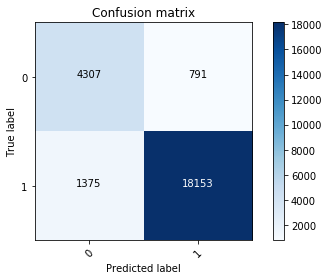

In [222]:
print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf, classes='01',
                      title='Confusion matrix')


Normalized confusion matrix
[[ 0.84  0.16]
 [ 0.07  0.93]]


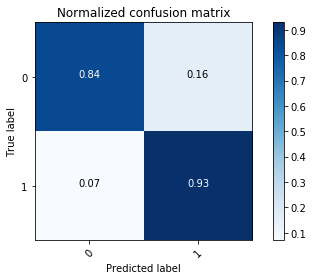

In [223]:
plt.figure()
plot_confusion_matrix(conf, classes='01', normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Predict test, create file for kaggle

In [225]:
test = pandas.read_csv(folder + 'test.csv', index_col='id')
result = pandas.DataFrame({'id': test.index})
result['prediction'] = (0.27*(model.predict_proba(test[variables])[:, 1])+
                        0.73*(model2.predict_proba(test[variables2])[:, 1]))

In [227]:
result.to_csv('JH101620.csv', index=False, sep=',')

In [228]:
ls -l JH101620.csv

 Volume in drive C is Windows
 Volume Serial Number is 1C17-4C29

 Directory of C:\MSDS\Proj\flavours-of-physics-start-master


 Directory of C:\MSDS\Proj\flavours-of-physics-start-master

10/20/2018  10:44 PM        24,808,231 JH101620.csv
               1 File(s)     24,808,231 bytes
               0 Dir(s)  78,172,057,600 bytes free
